# Previsão de Preço do Bitcoin 

## Importando bibliotecas

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import investpy
import numpy as np
seed=np.random.seed(0) #semente inicial (reprodução de resultados)

## Baixando a série histórica de 10 anos do bitcoin

In [100]:
# utilizando a biblioteca investpy
df=investpy.crypto.get_crypto_historical_data('bitcoin','01/01/2012','31/12/2021', as_json=False, order='ascending', interval='Daily')
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-01,4.7,5.5,4.6,5.3,108509,USD
2012-01-02,5.3,5.5,4.8,5.2,69151,USD
2012-01-03,5.2,5.3,4.7,4.9,125170,USD
2012-01-04,4.9,5.7,4.8,5.6,131171,USD
2012-01-05,5.6,7.2,5.6,6.9,182328,USD
...,...,...,...,...,...,...
2021-12-27,50783.6,52016.3,50459.0,50678.2,43902,USD
2021-12-28,50703.4,50703.8,47345.7,47545.2,74391,USD
2021-12-29,47548.4,48121.7,46127.8,46461.7,63923,USD


In [101]:
#Selecionando a coluna "Close"
df=df[['Close']]
df

,Close
Date,
2012-01-01,5.3
2012-01-02,5.2
2012-01-03,4.9
2012-01-04,5.6
2012-01-05,6.9
...,...
2021-12-27,50678.2
2021-12-28,47545.2
2021-12-29,46461.7


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2012-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3653 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB


In [103]:
df.describe()

,Close
count,3653.0
mean,7896.5
std,14202.4
min,4.2
25%,268.6
50%,944.2
75%,8630.2
max,67527.9


## Gerando relatório sobre os dados

In [104]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


## Gráfico da série histórica

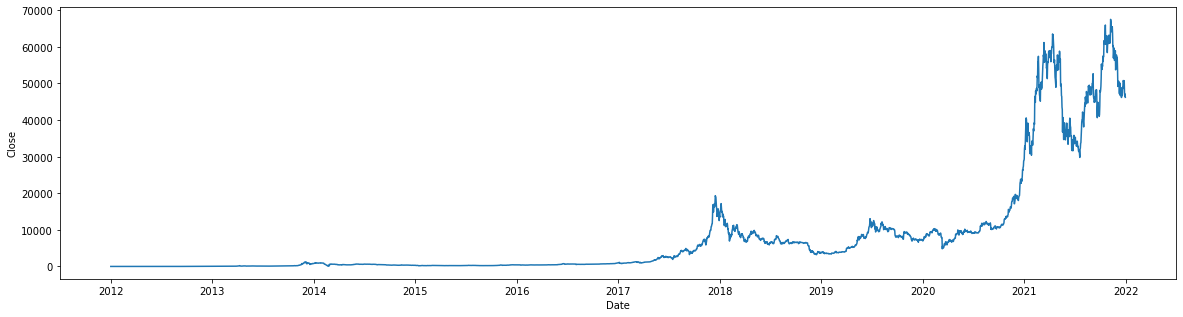

In [105]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df)
plt.show()

## Detectando autocorrelação

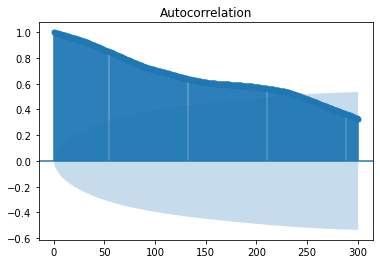

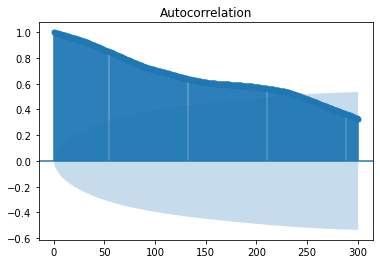

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'], lags=300)


## Criando Janelamento

In [107]:
#Criando uma janela de 252 dias 
window = 252
dataSize = len(df)
X = []
y = []
for i in range(window, dataSize):
    X.append(df.iloc[i-window:i, 0])
    y.append(df.iloc[i, 0])
X, y = np.array(X), np.array(y)



In [108]:
print(X.shape)
print(y.shape)

(3401, 252)
(3401,)


# Machine Learning

In [109]:
#Dividindo a base de dados em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Utilizando o modelo Random Forrest

In [110]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=seed)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
y_pred = regressor.predict(x_test)

## Avaliando o modelo

Resultados de Teste
RMSE:  643.2469602642027
MSE:  413766.6518891368
MAPE:  3.2228005699564006 %
R2:  0.9979982407474771


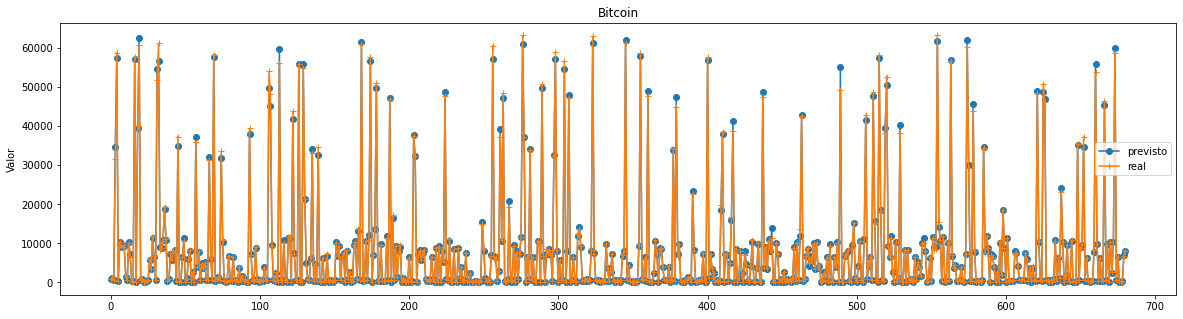

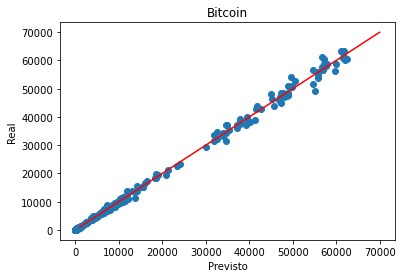

In [112]:
def evaluate(y_test, y_pred):
  import math
  from sklearn.metrics import mean_squared_error
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  print('RMSE: ', rmse)

  mse = mean_squared_error(y_test, y_pred)
  print('MSE: ',mse)

  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print('MAPE: ',mape, '%')

  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)

  # Gráfico 1
  plt.figure(figsize=(20,5))
  plt.plot(y_pred, label='previsto', marker='o')
  plt.plot(y_test, label='real', marker='+')
  plt.ylabel("Valor")
  plt.title("Bitcoin")
  plt.legend()
  plt.show()

  # Gráfico 2
  plt.scatter(y_pred,y_test)
  plt.ylabel("Real")
  plt.xlabel("Previsto")
  plt.title("Bitcoin")

  x = [1000.0, 70000.0]
  plt.plot(x, x, color='red'); # reta onde y=x (modelo perfeito)

  plt.show()

print('Resultados de Teste')
evaluate(y_test, y_pred)

## Utilizando o modelo XGBoost

In [113]:
import xgboost as xg

xgb_r = xg.XGBRegressor(random_state=seed)
regressor =xgb_r
regressor.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
y_pred = regressor.predict(x_test)

RMSE:  809.1269357873161
MSE:  654686.3982165717
MAPE:  5.053105526829806 %
R2:  0.9968326965231552


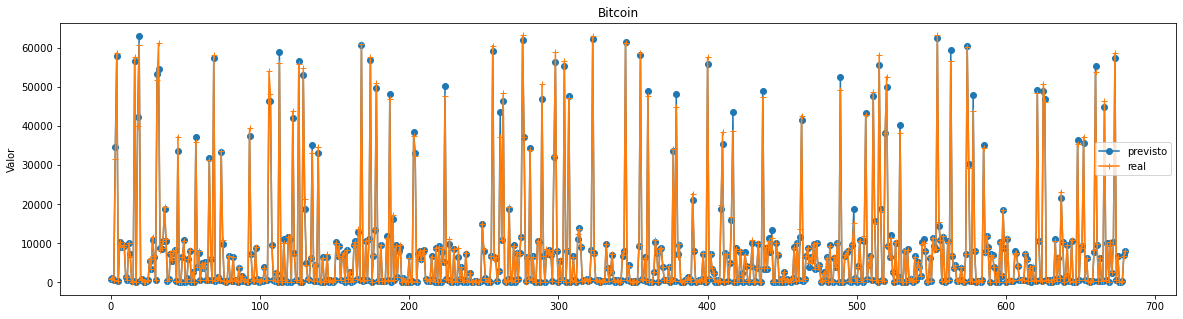

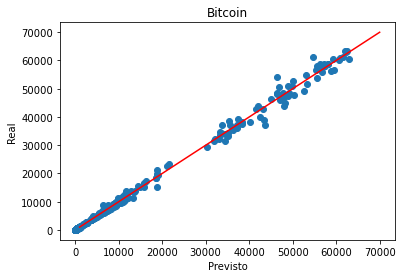

In [115]:
evaluate(y_test, y_pred)

### O Modelo Random Forrest mostrou resultados um pouco melhores

In [116]:
#Reutilizando o modelo Random Forrest
regressor = RandomForestRegressor(random_state=seed)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [117]:
lag = df.iloc[dataSize-window:dataSize,0].values
df.tail(window)

,Close
Date,
2021-04-24,50088.9
2021-04-25,48963.6
2021-04-26,54020.5
2021-04-27,55036.5
2021-04-28,54841.4
...,...
2021-12-27,50678.2
2021-12-28,47545.2
2021-12-29,46461.7


In [118]:
lag = lag.reshape(1, -1)
print(lag.shape)


(1, 252)


In [119]:
regressor.predict(lag)

array([46015.531])

## Prevendo 10 passos à frente

In [120]:
timesteps_to_predict = 10
lag = df.iloc[dataSize-window:dataSize,0].values
lag = lag.reshape(1, -1)

predictions=[]
for i in range(timesteps_to_predict):
  prediction = regressor.predict(lag)
  predictions.append(prediction)

  lag = lag[0, 1:window]  
  lag = np.append(lag, prediction[0])
  lag = lag.reshape(1, -1)

In [121]:

date=pd.date_range(start ='1-1-2022', end ='1-10-2022')
date
df_pred=pd.DataFrame(predictions,columns=['Predictions'],index=date)
pd.options.display.float_format = '{:.1f}'.format
df_pred

,Predictions
2022-01-01,46015.5
2022-01-02,45850.5
2022-01-03,46045.2
2022-01-04,45916.5
2022-01-05,45944.3
2022-01-06,45932.5
2022-01-07,46065.4
2022-01-08,45920.4
2022-01-09,45965.7
2022-01-10,45959.1


In [122]:
df_real=investpy.crypto.get_crypto_historical_data('bitcoin','01/01/2022','10/01/2022', as_json=False, order='ascending', interval='Daily')
y_pred=df_pred['Predictions']
y_real=df_real['Close']
results = pd.DataFrame(zip(y_pred, y_real, y_pred - y_real), columns = ['Previsto', 'Real', 'Erro'])
results

,Previsto,Real,Erro
0,46015.5,47738.0,-1722.5
1,45850.5,47311.8,-1461.3
2,46045.2,46430.2,-385.0
3,45916.5,45837.3,79.2
4,45944.3,43425.9,2518.4
5,45932.5,43097.5,2835.0
6,46065.4,41546.7,4518.7
7,45920.4,41672.0,4248.4
8,45965.7,41848.3,4117.4
9,45959.1,41832.2,4126.9


## Gerando Gráfico Previsto X Real

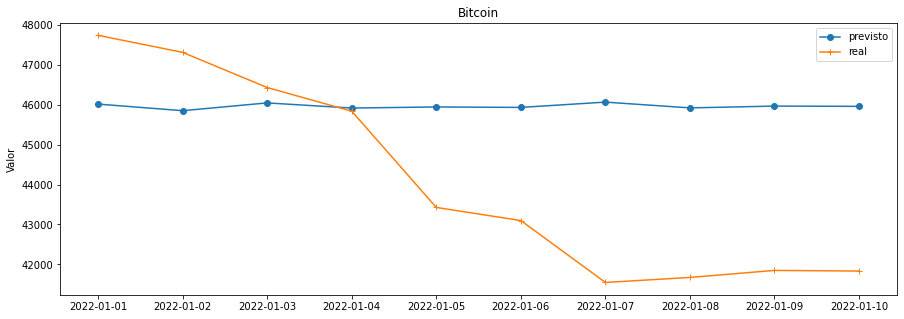

In [123]:

plt.figure(figsize=(15,5))
plt.plot(y_pred, label='previsto', marker='o')
plt.plot(y_real, label='real', marker='+')
plt.ylabel("Valor")
plt.title("Bitcoin")
plt.legend()
plt.show()



## Observações

Podemos observar que o modelo previu uma tendência de pouca volatilidade, sem uma tendência definida. Os dados reais mostram que houve uma queda no período. Poderia haver uma oportunidade de venda do ativo quando as linhas do gráfico (previsto x real) cruzaram...